In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Crime_Incidents_July_2023_to_Present_20250916 - Crime_Incidents_July_2023_to_Present_20250916.csv.csv')

In [3]:
df

,Incident Case Id,Date,Clearance Code Inc Type,Latitude,Longitude,Location
0,PP24010100000090,01/01/2024,ASSAULT,38.817105,-76.993919,"(38.817105397582054,-76.99391935765743)"
1,PP24010100000190,01/01/2024,ACCIDENT,38.915858,-76.906977,"(38.91585847735405,-76.90697728097439)"
2,PP24010100000201,01/01/2024,ACCIDENT WITH IMPOUND,38.846305,-76.926662,"(38.846304804086685,-76.92666228115559)"
3,PP24010100000342,01/01/2024,ASSAULT,38.989677,-76.836111,"(38.98967722058296,-76.83611127734184)"
4,PP24010100000383,01/01/2024,"AUTO, STOLEN",38.948995,-76.850547,"(38.948994889855385,-76.85054694116116)"
...,...,...,...,...,...,...
57706,PP24123100002017,12/31/2024,THEFT FROM AUTO,38.896830,-76.824300,"(38.89682964980602,-76.82430027425289)"
57707,PP24123100002110,12/31/2024,THEFT FROM AUTO,38.870255,-76.849891,"(38.87025488913059,-76.84989078342915)"
57708,PP24123100002318,12/31/2024,ACCIDENT WITH IMPOUND,38.810544,-76.824300,"(38.81054373085499,-76.82430027425289)"
57709,PP24123100002334,12/31/2024,ACCIDENT WITH IMPOUND,38.818746,-76.999825,"(38.81874580681324,-76.99982486665249)"


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [5]:
df = df[~df['Date'].dt.year.isin([2023, 2024])]
print(df['Date'].dt.year.unique())

[2025]


In [6]:
df

,Incident Case Id,Date,Clearance Code Inc Type,Latitude,Longitude,Location
77,PP25010100000085,2025-01-01,ACCIDENT,38.953916,-76.854812,"(38.953916147351265,-76.85481202602386)"
78,PP25010100000115,2025-01-01,"B & E, RESIDENTIAL",38.977210,-76.977515,"(38.977210059762,-76.97751519083977)"
79,PP25010100000138,2025-01-01,ACCIDENT,38.847945,-76.952909,"(38.84794522821903,-76.95290894806385)"
80,PP25010100000214,2025-01-01,ACCIDENT,38.766252,-76.995232,"(38.76625247299671,-76.99523170292377)"
81,PP25010100000290,2025-01-01,ASSAULT,38.981803,-76.930599,"(38.981803223490715,-76.93059927225113)"
...,...,...,...,...,...,...
40239,PP25091100001560,2025-09-11,THEFT,38.999520,-76.975875,"(38.99951972067356,-76.97587478160858)"
40240,PP25091100001569,2025-09-11,ACCIDENT,38.766252,-76.994247,"(38.76625247299671,-76.9942474514246)"
40241,PP25091100001743,2025-09-11,THEFT,38.926357,-76.888933,"(38.92635715007782,-76.88893269002438)"
40242,PP25091100001931,2025-09-11,ACCIDENT,38.985084,-76.841033,"(38.98508405685425,-76.84103253483772)"


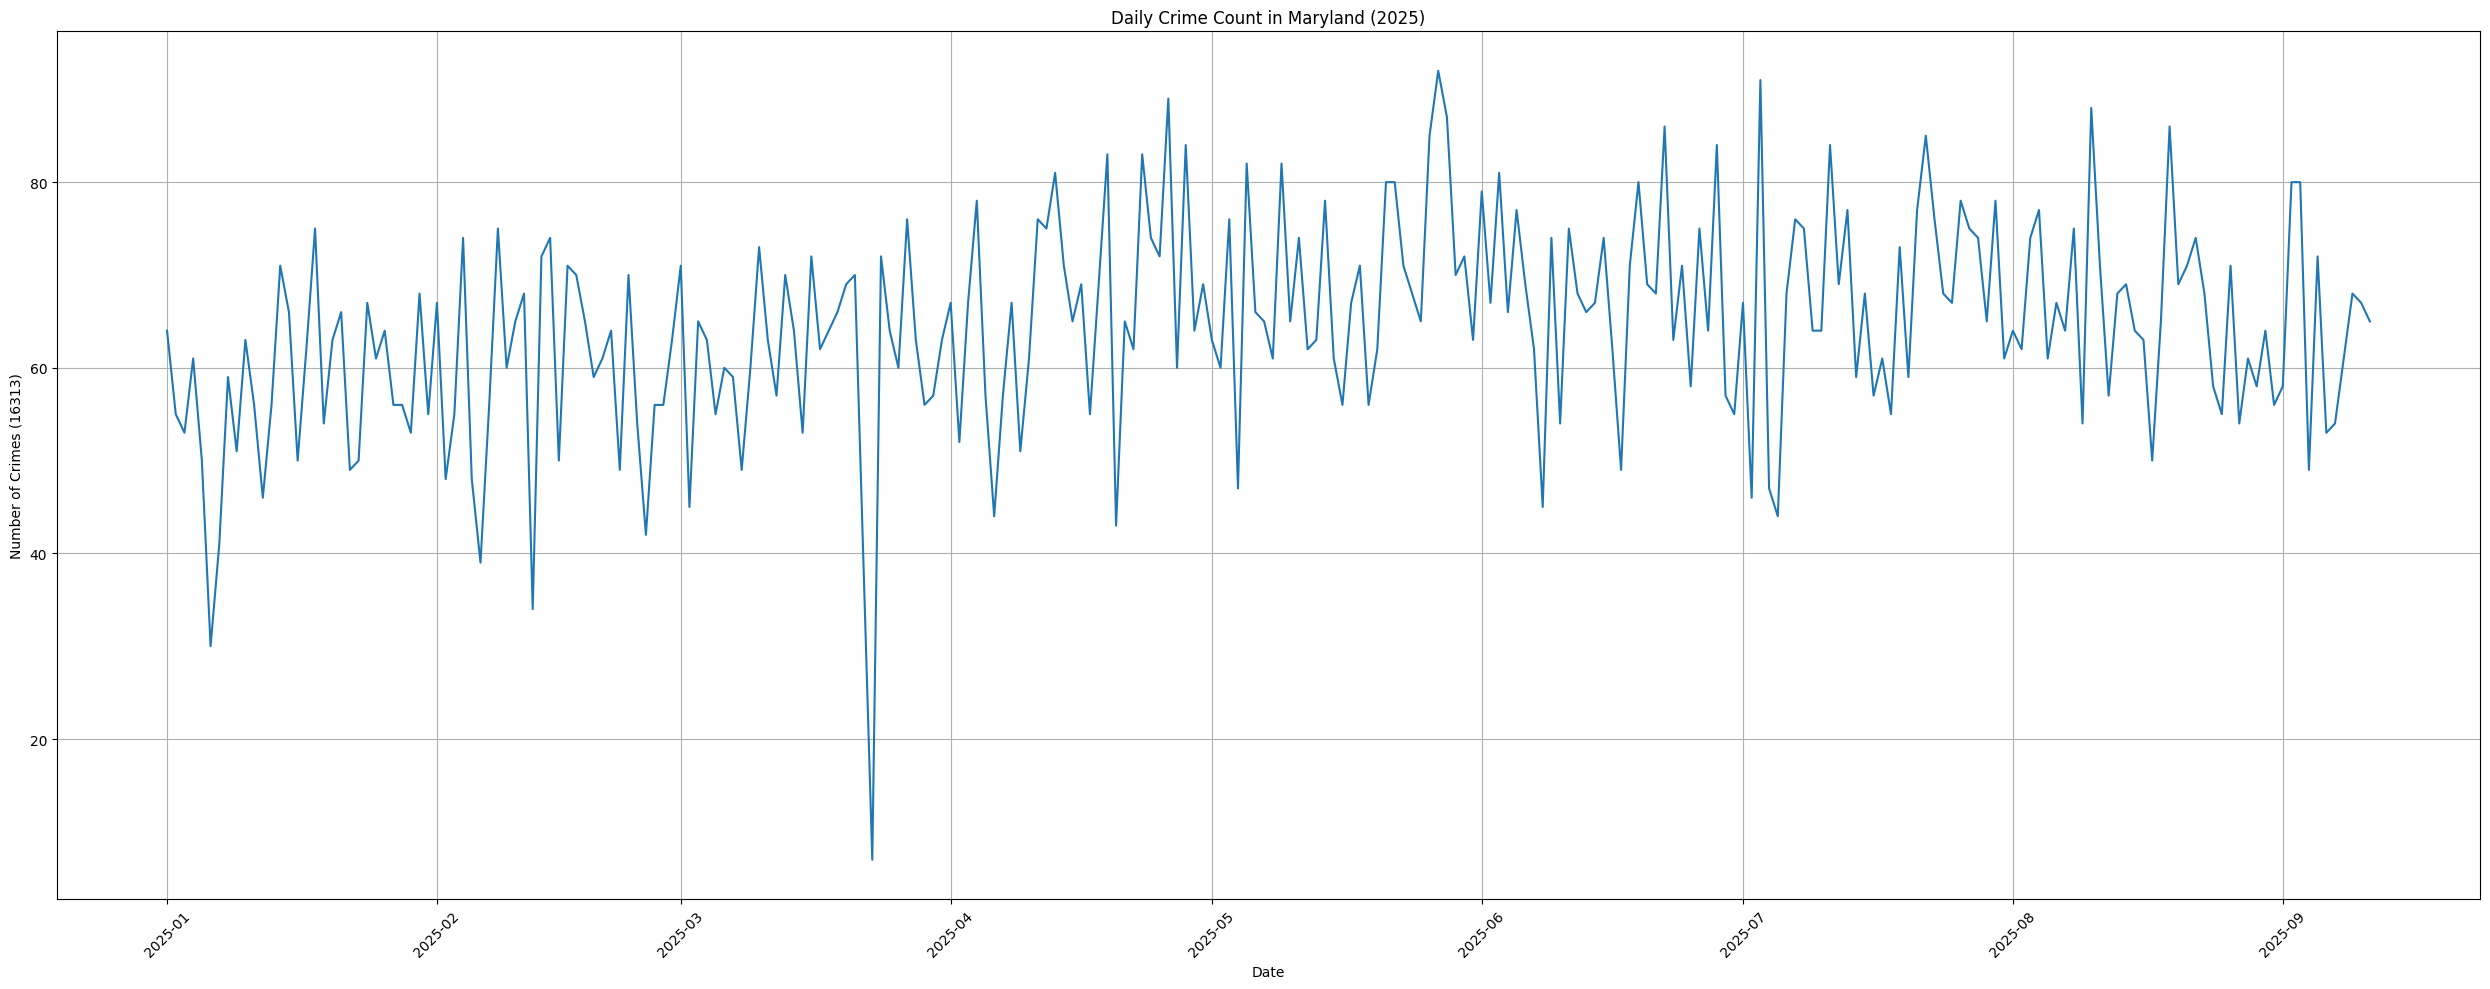

In [35]:
plt.figure(figsize=(25,10))
plt.plot(daily_crimes['Date'], daily_crimes['crime_count'])
plt.title("Daily Crime Count in Maryland (2025)")
plt.xlabel("Date")
plt.ylabel(f"Number of Crimes ({daily_crimes['crime_count'].sum()})")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df[~df['Date'].dt.year.isin([2023, 2024])]
print(df.columns)

Index(['Incident Case Id', 'Date', 'Clearance Code Inc Type', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


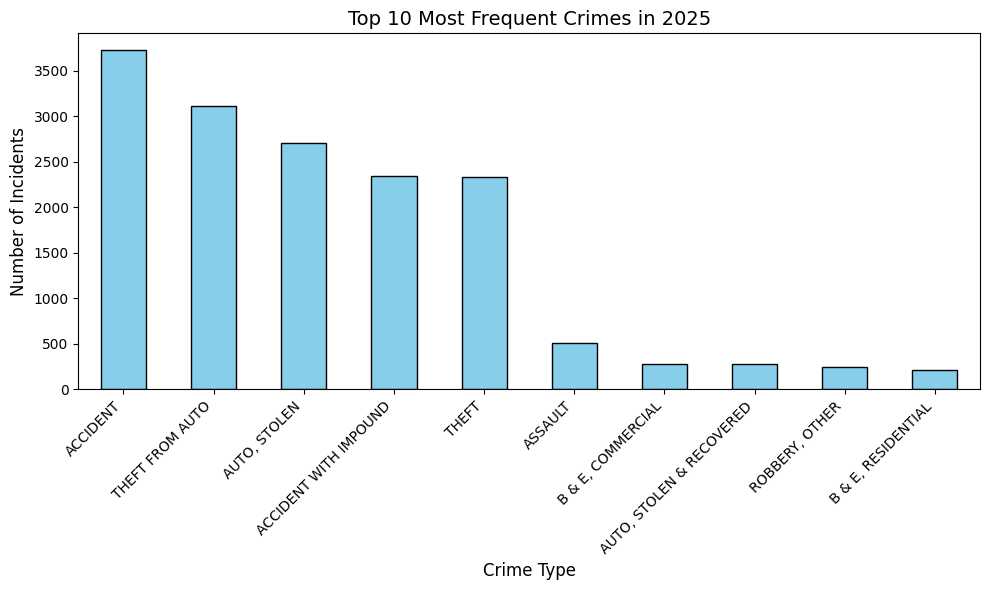

In [20]:
crime_counts = df['Clearance Code Inc Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
crime_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Most Frequent Crimes in 2025", fontsize=14)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
data_2025 = df[~df['Date'].dt.year.isin([2023, 2024])]
print(data_2025.columns)

Index(['Incident Case Id', 'Date', 'Clearance Code Inc Type', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


In [25]:
mapObj = folium.Map([38.989697, -76.937759], zoom_start =6)

heat_map = data_2025[['Latitude', 'Longitude']].values.tolist()

HeatMap(heat_map).add_to(mapObj)

mapObj.save("heatmap.html")